In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from Esme.helper.io_related import make_dir
import os


In [2]:
sys.path.append('../')

In [3]:
from util import *


stair is of length 26


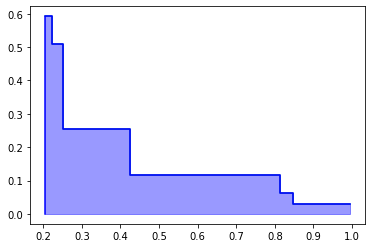

In [4]:
n = 30
f = np.random.random((n, 1))
f[10] = 0.1
distm = np.random.random((n, n))
distm = distm + distm.T
x = 10
sigma = 0.2
sigmas = [f[i][0] for i in range(n) if f[i][0] > sigma]
sigmas.sort()

stair = []
for sigma in sigmas:
    sig, eps = I_x(f, distm, x, sigma)
    stair.append((sig, eps))
print(f'stair is of length {len(stair)}')
viz_stair_(stair)

viz_stair(stair, plot=True, show=True)


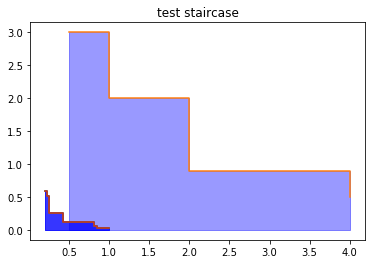

In [5]:
stair_ = [(0.5, 3),(1,2),(2,0.9),(4,0.5)]
stairs = [stair, stair_, stair, stair]
title='test staircase'
viz_stairs_(stairs, title=title)


In [6]:
from sklearn.neighbors.kde import KernelDensity
from ptc_model import two_cycle
from sklearn.neighbors.kde import KernelDensity
from Esme.helper.format import precision_format as pf

from ptc_model import two_cycle
from I_x.I_x_slice import I_x_slice_
from util import viz_stair, get_epsilon
from viz import viz_pd

import time
import sys
from joblib import Parallel, delayed
from argparse import ArgumentDefaultsHelpFormatter, ArgumentParser
from example import get_stair

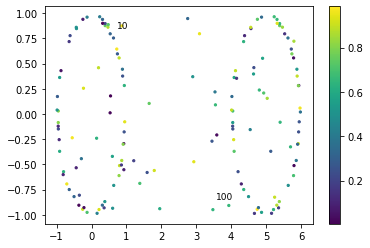

In [7]:
start_t = time.time()
idx = 10
n = 50
show_flag = True
save_flag = False

# specify toy models
points, distm = two_cycle(n)
if show_flag: viz_pd(points, show=True, color=None, annotate=[10, 100])

f = - density(points).reshape(len(points),1)



In [26]:
stair = get_stair(f, distm, idx=idx, method='heu')

# viz
end_t = time.time()
title = f'I_x for {idx} with co-density {pf(f[idx][0], 2)}. Comp.T: {pf(end_t - start_t, 1)}'
viz_stair(stair, show=show_flag, title=title, save=save_flag, dir='./img/', f=f'{idx}.png')


[(0, 0)]

IndexError: index 21 is out of bounds for axis 0 with size 11

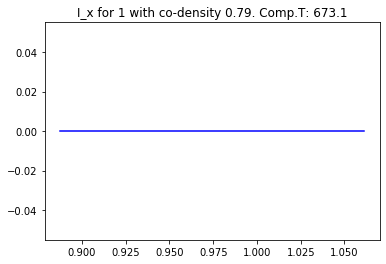

In [27]:
stairs = []
show_flag = False
idx_set = range(1,100,20)
for idx in idx_set:
    stair = get_stair(f, distm, idx=idx, method='heu')
    stairs.append(stair)

    # viz
    end_t = time.time()
    title = f'I_x for {idx} with co-density {pf(f[idx][0], 2)}. Comp.T: {pf(end_t - start_t, 1)}'
    viz_stair(stair, show=show_flag, title=title, save=save_flag, dir='./img/', f=f'{idx}.png')


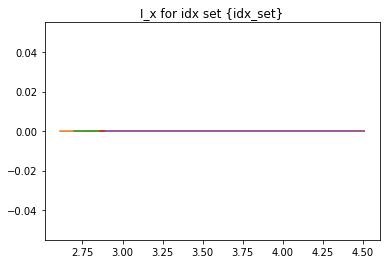

In [10]:
title = 'I_x for idx set {idx_set}'
viz_stairs_(stairs, title=title)

# points on the line

In [29]:
from ptc_model import point_online
show_flag = False
uniform=False
points, distm = point_online(uniform=uniform)

if show_flag: viz_pd(points, show=True, color=None, annotate=None)

f = - density(points).reshape(len(points),1)


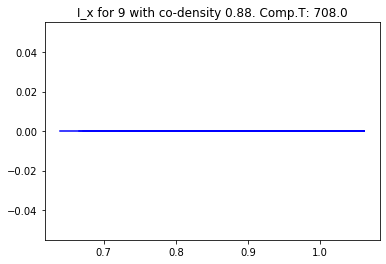

In [35]:
stairs = []
show_flag = False
idx_set = range(len(f))
for idx in idx_set:
    stair = get_stair(f, distm, idx=idx, method='heu')
    stairs.append(stair)

    # viz
    end_t = time.time()
    title = f'I_x for {idx} with co-density {pf(f[idx][0], 2)}. Comp.T: {pf(end_t - start_t, 1)}'
#     viz_stair_(stair)
    viz_stair(stair, show=show_flag, title=title, save=save_flag, dir='./img/', f=f'{idx}.png')



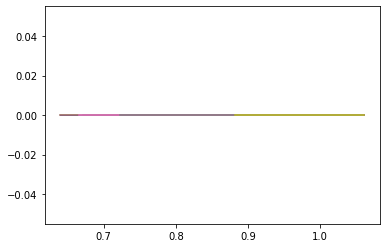

In [19]:
viz_stairs_(stairs)

In [23]:
class prettyfloat(tuple):
    def __repr__(self):
        return "(%0.2f" % self[0] + ", %0.2f" % self[1] + ")"
    
for stair in stairs:
    stair = list(map(prettyfloat,stair))
    print(stair)

[]
[(0.89, 0.00), (1.06, 0.00), (1.06, 0.00)]
[(0.79, 0.00), (0.88, 0.00), (1.06, 0.00), (1.06, 0.00)]
[(0.75, 0.00), (0.79, 0.00), (0.89, 0.00), (1.06, 0.00)]
[(0.67, 0.00), (0.75, 0.00), (0.79, 0.00), (0.88, 0.00), (1.06, 0.00)]
[(0.64, 0.00), (0.67, 0.00), (0.72, 0.00), (0.75, 0.00), (1.06, 0.00)]
[(0.67, 0.00), (0.67, 0.00), (0.75, 0.00), (0.79, 0.00), (1.06, 0.00)]
[(0.72, 0.00), (0.79, 0.00), (0.88, 0.00), (0.89, 0.00), (1.06, 0.00)]
[(0.88, 0.00), (1.06, 0.00), (1.06, 0.00)]
[(1.06, 0.00)]
[]


In [22]:
stairs[5]

[(0.6391823748003904, 0),
 (0.6652321588678063, 0),
 (0.7230025390509491, 0),
 (0.7499458414889244, 0),
 (1.0613525008200173, 0)]